# Data preprocessing

Download the data

In [ ]:
import requests

url = 'https://www.cs.cmu.edu/~enron/enron_mail_20150507.tar.gz'
response = requests.get(url)

with open('enron_mail_20150507.tar.gz', 'wb') as file:
    file.write(response.content)


Extract the data

In [ ]:
import tarfile

# Extract the file
with tarfile.open('enron_mail_20150507.tar.gz', 'r:gz') as tar:
    tar.extractall('enron_data')


The Enron dataset is a collection of emails from the Enron Corporation, and it's organized into folders and files to reflect the structure of the email accounts of various employees. Here's a breakdown of the structure:

1. Top-Level Folders: Each top-level folder represents an individual employee's email account. For example, folders like allen-p, badeer-r, bailey-s, etc., correspond to different employees.

2. Subfolders: Within each employee's folder, there are subfolders that represent different email categories or folders within their email account. Common subfolders include:

  * inbox: Contains received emails.

  * sent_items: Contains sent emails.

  * deleted_items: Contains deleted emails.

  * all_documents: Contains all documents related to the employee.

  * notes_inbox: Contains notes received.

  * calendar: Contains calendar entries.

  * contacts: Contains contact information.

3. Email Files: Each subfolder contains individual email files, typically in plain text format. These files represent individual email messages.

In [ ]:
import os
import pandas as pd

data = []

# Traverse the extracted directory and read email files
for root, dirs, files in os.walk('enron_data/maildir'):
    for file in files:
          file_path = os.path.join(root, file)
          with open(file_path, 'r', encoding='latin1') as f:
              content = f.read()
              data.append(content)

# Create a dataframe from the collected email contents
df = pd.DataFrame(data, columns=['email_content'])
print(df.head())


                                       email_content
0  Message-ID: <29166504.1075855436291.JavaMail.e...
1  Message-ID: <28667593.1075855436366.JavaMail.e...
2  Message-ID: <8158242.1075855436390.JavaMail.ev...
3  Message-ID: <4741120.1075855436319.JavaMail.ev...
4  Message-ID: <15657331.1075847214145.JavaMail.e...


In [ ]:
df.shape

(517401, 1)

In [ ]:
print(df.iloc[576,0])

Message-ID: <12128627.1075846986017.JavaMail.evans@thyme>
Date: Fri, 4 Aug 2000 23:34:00 -0700 (PDT)
From: memberservices@travelocity.m0.net
To: tana.jones@enron.com
Subject: Get the inside scoop with Travelocity's Insider & Real Deals
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Travelocity.com" <memberservices@travelocity.m0.net>
X-To: TANA.JONES@enron.com
X-cc: 
X-bcc: 
X-Folder: \Tanya_Jones_Dec2000\Notes Folders\All documents
X-Origin: JONES-T
X-FileName: tjones.nsf

Dear Tana,

Millions of people enjoy them every month, people tell us everyday 
how helpful they are, and now we're happy to be able to offer them to 
you too. It's the Real Deals and The Insider newsletters and we 
thought they might be something you'd enjoy too! These two 
electronic newsletters are now available, free, to 
Travelocity.com members. 

Real Deals is delivered to your inbox twice each month and is full of 
great travel information, special fares,

**Information Part**

Let's seperate the "info" and "content" parts, and deal with the information part first.

In [ ]:
def info_part(i):
  return i.split('\n\n', 1)[0]

def content_part(i):
  return i.split('\n\n', 1)[1]

#test
info=info_part(df.iloc[576,0])
content=content_part(df.iloc[576,0])

print(f'info: \n{info}')
print('-----------------------')
print(f'content: \n{content}')

info: 
Message-ID: <12128627.1075846986017.JavaMail.evans@thyme>
Date: Fri, 4 Aug 2000 23:34:00 -0700 (PDT)
From: memberservices@travelocity.m0.net
To: tana.jones@enron.com
Subject: Get the inside scoop with Travelocity's Insider & Real Deals
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Travelocity.com" <memberservices@travelocity.m0.net>
X-To: TANA.JONES@enron.com
X-cc: 
X-bcc: 
X-Folder: \Tanya_Jones_Dec2000\Notes Folders\All documents
X-Origin: JONES-T
X-FileName: tjones.nsf
-----------------------
content: 
Dear Tana,

Millions of people enjoy them every month, people tell us everyday 
how helpful they are, and now we're happy to be able to offer them to 
you too. It's the Real Deals and The Insider newsletters and we 
thought they might be something you'd enjoy too! These two 
electronic newsletters are now available, free, to 
Travelocity.com members. 

Real Deals is delivered to your inbox twice each month and is full of 


In [ ]:
new_df=pd.DataFrame()
new_df['info']= df.email_content.map(info_part)
new_df['content']=df.email_content.map(content_part)

new_df.head()

,info,content
0,Message-ID: <29166504.1075855436291.JavaMail.e...,"Notice to Members No. 01-194\nJune 7, 2001\n\n..."
1,Message-ID: <28667593.1075855436366.JavaMail.e...,"Notice No. 01-201\nJune 14, 2001\n\nNote: To v..."
2,Message-ID: <8158242.1075855436390.JavaMail.ev...,"Notice No.: 01-203\nJune 25, 2001\n\nTo:\nAll..."
3,Message-ID: <4741120.1075855436319.JavaMail.ev...,"Notice # 01-186\nJune 1, 2001\n\nTO:\nAll NYME..."
4,Message-ID: <15657331.1075847214145.JavaMail.e...,"Tana,\n\nEveryone who has access to Lotus Note..."


In [ ]:
words2split = ['Message-ID: ', 'Date: ', 'From: ', 'To: ', 'Subject: ', 'Cc: ', 'Mime-Version: ', 'Content-Type: ',
               'Content-Transfer-Encoding: ', 'Bcc: ', 'X-From: ', 'X-To: ', 'X-cc: ', 'X-bcc: ', 'X-Folder: ', 'X-Origin: ',
               'X-FileName: ']
features_naming = [i[:-2] for i in words2split]
split_condition = '|'.join(words2split)

In [ ]:
split_condition

'Message-ID: |Date: |From: |To: |Subject: |Cc: |Mime-Version: |Content-Type: |Content-Transfer-Encoding: |Bcc: |X-From: |X-To: |X-cc: |X-bcc: |X-Folder: |X-Origin: |X-FileName: '

In [ ]:
features_naming

['Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Cc',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'Bcc',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']

In [ ]:
import re

# let's check how many categories are there in these emails
def num_part(i):
    return len(re.split(split_condition, i))
new_df['num_info'] = new_df['info'].map(num_part)

In [ ]:
new_df['num_info'].value_counts()

,count
num_info,
16,369198
18,119028
15,20212
19,7389
17,1571
5,2
6,1


So there are so many emails which doesn't have all parts of info!

In [ ]:
print(new_df.loc[new_df['num_info']==6]['info'])

264877    Message-ID: <21985829.1075858967322.JavaMail.e...
Name: info, dtype: object


In [ ]:
# Some emails' subject confuse the string-spliting function, so I make a little change
def duplicated_info(i):
    return i.replace(' Date: ', ' Date- ').replace(' Subject: ', ' Subject2: ').replace(' To: ',
                    ' To- ').replace(' (Subject: ', ' (Subject- ')
new_df['info'] = new_df['info'].map(duplicated_info)

In [ ]:
new_df['num_info'] = new_df['info'].map(num_part)
new_df['num_info'].value_counts()

,count
num_info,
16,369135
18,126416
15,20380
17,1467
5,2
6,1


In [ ]:
# some emails dont have the "Cc:" and "Bcc:" categories, so we add!
temp_condition = (new_df['num_info'] == 16) | (new_df['num_info'] == 15)
def add_bcc(i):
    return i.replace('\nX-From: ', '\nBcc: \nX-From: ')
new_df.loc[temp_condition, 'info'] = new_df.loc[temp_condition, 'info'].map(add_bcc)
def add_cc(i):
    return i.replace('\nMime-Version: ', '\nCc: \nMime-Version: ')
new_df.loc[temp_condition, 'info'] = new_df.loc[temp_condition, 'info'].map(add_cc)

#test
new_df['num_info'] = new_df['info'].map(num_part)
new_df['num_info'].value_counts()

,count
num_info,
18,495551
17,21847
5,2
6,1


In [ ]:
# around 20k emails do not have the 'To: ' category, so I add one
def add_to(i):
    return i.replace('\nSubject: ', '\nTo: \nSubject: ')
temp_condition = (new_df['num_info'] == 17)
new_df.loc[temp_condition, 'info'] = new_df.loc[temp_condition, 'info'].map(add_to)

#test
new_df['num_info'] = new_df['info'].map(num_part)
new_df['num_info'].value_counts()

,count
num_info,
18,517398
5,2
6,1


There are still three wrong formatted email! we easily delete them.

In [ ]:
print(new_df[new_df['num_info'] <= 6])

new_df.drop(new_df[new_df['num_info'] <= 6].index, inplace=True)



                                                     info  \
107329  Message-ID: <20932070.1075855140688.JavaMail.e...   
107902  Message-ID: <15722007.1075840335489.JavaMail.e...   
264877  Message-ID: <21985829.1075858967322.JavaMail.e...   

                                                  content  num_info  
107329  \n12.\n13.\nMime-Version: 1.0\nContent-Type: t...         5  
107902  \n12.\n13.\nMime-Version: 1.0\nContent-Type: t...         5  
264877  in\n Conference Room EB3872 \n\nto dicuss tari...         6  


In [ ]:
global feature_idx
def info_split(i):
    ## split the i th part out and remove \n for the feature
    return re.split(split_condition, i)[feature_idx+1][:-2]
def info_split_last(i):
    ## no need to remove \n for last category -- X-FileName
    return re.split(split_condition, i)[feature_idx+1]
for feature_idx in range(len(words2split)):
    if feature_idx != len(words2split) - 1:
        new_df[features_naming[feature_idx]] = new_df['info'].map(info_split)
    else:
        new_df[features_naming[feature_idx]] = new_df['info'].map(info_split_last)

In [ ]:
new_df.to_csv("/content/drive/MyDrive/enron email/emails_cleaned.csv")
new_df.head()

,info,content,num_info,Message-ID,Date,From,To,Subject,Cc,Mime-Version,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,Message-ID: <29166504.1075855436291.JavaMail.e...,"Notice to Members No. 01-194\nJune 7, 2001\n\n...",18,<29166504.1075855436291.JavaMail.evans@thyme,"Thu, 7 Jun 2001 20:15:00 -0700 (PDT",exchangeinfo@nymex.co,tana.jones@enron.co,(01-194) Amendments to NYMEX Division Position...,,1.,text/plain; charset=us-asci,7bi,,exchangeinfo@nymex.com <exchangeinfo@nymex.com...,tana.jones <tana.jones@enron.com,,,"\Tana_Jones_Jan2002\Jones, Tana\trading issue",Jones-,tjones (Non-Privileged).pst
1,Message-ID: <28667593.1075855436366.JavaMail.e...,"Notice No. 01-201\nJune 14, 2001\n\nNote: To v...",18,<28667593.1075855436366.JavaMail.evans@thyme,"Thu, 14 Jun 2001 13:56:43 -0700 (PDT",exchangeinfo@nymex.co,tana.jones@enron.co,(01-201) Amendment to Super Margin Calculatio,,1.,text/plain; charset=us-asci,7bi,,exchangeinfo@nymex.com@ENRON <IMCEANOTES-excha...,"Jones, Tana </O=ENRON/OU=NA/CN=RECIPIENTS/CN=T...",,,"\Tana_Jones_Jan2002\Jones, Tana\trading issue",Jones-,tjones (Non-Privileged).pst
2,Message-ID: <8158242.1075855436390.JavaMail.ev...,"Notice No.: 01-203\nJune 25, 2001\n\nTo:\nAll...",18,<8158242.1075855436390.JavaMail.evans@thyme,"Mon, 25 Jun 2001 14:33:13 -0700 (PDT",exchangeinfo@nymex.co,tana.jones@enron.co,(01-203) Proposed Give-Up Rule,,1.,text/plain; charset=us-asci,7bi,,exchangeinfo@nymex.com@ENRON <IMCEANOTES-excha...,"Jones, Tana </O=ENRON/OU=NA/CN=RECIPIENTS/CN=T...",,,"\Tana_Jones_Jan2002\Jones, Tana\trading issue",Jones-,tjones (Non-Privileged).pst
3,Message-ID: <4741120.1075855436319.JavaMail.ev...,"Notice # 01-186\nJune 1, 2001\n\nTO:\nAll NYME...",18,<4741120.1075855436319.JavaMail.evans@thyme,"Fri, 1 Jun 2001 18:07:00 -0700 (PDT",exchangeinfo@nymex.co,tana.jones@enron.co,(01-186) Implementation of Amendments on Use o...,,1.,text/plain; charset=us-asci,7bi,,exchangeinfo@nymex.com <exchangeinfo@nymex.com...,tana.jones <tana.jones@enron.com,,,"\Tana_Jones_Jan2002\Jones, Tana\trading issue",Jones-,tjones (Non-Privileged).pst
4,Message-ID: <15657331.1075847214145.JavaMail.e...,"Tana,\n\nEveryone who has access to Lotus Note...",18,<15657331.1075847214145.JavaMail.evans@thyme,"Thu, 19 Oct 2000 03:49:00 -0700 (PDT",michael.neves@enron.co,tana.jones@enron.co,Re: ISDA Master Agreement Data Bas,,1.,text/plain; charset=us-asci,7bi,,Michael Neve,Tana Jone,,,\Tanya_Jones_Dec2000\Notes Folders\Trading issue,JONES-,tjones.nsf


# main

In [ ]:
# pandas & numpy:
import numpy as np
import pandas as pd

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# tokenization:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string

In [5]:
emails=pd.read_csv("/content/drive/MyDrive/enron email/emails_cleaned.csv")
emails.info()

<ipython-input-5-30398241761d>:1: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  emails=pd.read_csv("/content/drive/MyDrive/enron email/emails_cleaned.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517398 entries, 0 to 517397
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 517398 non-null  int64 
 1   info                       517398 non-null  object
 2   content                    517398 non-null  object
 3   num_info                   517398 non-null  int64 
 4   Message-ID                 517398 non-null  object
 5   Date                       517398 non-null  object
 6   From                       517398 non-null  object
 7   To                         495553 non-null  object
 8   Subject                    498118 non-null  object
 9   Cc                         127883 non-null  object
 10  Mime-Version               517398 non-null  object
 11  Content-Type               517398 non-null  object
 12  Content-Transfer-Encoding  517398 non-null  object
 13  Bcc                        127883 non-null  

In [6]:
# Dataset cleaning function:

def clean_data(df):
    df=df.drop(columns=['Unnamed: 0','info', 'num_info', 'Date', 'Cc', 'Mime-Version', 'Content-Type','Content-Transfer-Encoding', 'Bcc', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName' ])
    return df

emails=clean_data(emails)
emails.head()

,content,Message-ID,From,To,Subject
0,"Notice to Members No. 01-194\nJune 7, 2001\n\n...",<29166504.1075855436291.JavaMail.evans@thyme,exchangeinfo@nymex.co,tana.jones@enron.co,(01-194) Amendments to NYMEX Division Position...
1,"Notice No. 01-201\nJune 14, 2001\n\nNote: To v...",<28667593.1075855436366.JavaMail.evans@thyme,exchangeinfo@nymex.co,tana.jones@enron.co,(01-201) Amendment to Super Margin Calculatio
2,"Notice No.: 01-203\nJune 25, 2001\n\nTo:\nAll...",<8158242.1075855436390.JavaMail.evans@thyme,exchangeinfo@nymex.co,tana.jones@enron.co,(01-203) Proposed Give-Up Rule
3,"Notice # 01-186\nJune 1, 2001\n\nTO:\nAll NYME...",<4741120.1075855436319.JavaMail.evans@thyme,exchangeinfo@nymex.co,tana.jones@enron.co,(01-186) Implementation of Amendments on Use o...
4,"Tana,\n\nEveryone who has access to Lotus Note...",<15657331.1075847214145.JavaMail.evans@thyme,michael.neves@enron.co,tana.jones@enron.co,Re: ISDA Master Agreement Data Bas


In [7]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517398 entries, 0 to 517397
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   content     517398 non-null  object
 1   Message-ID  517398 non-null  object
 2   From        517398 non-null  object
 3   To          495553 non-null  object
 4   Subject     498118 non-null  object
dtypes: object(5)
memory usage: 19.7+ MB


In [9]:
emails=emails.dropna().reset_index(drop=True)
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476638 entries, 0 to 476637
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   content     476638 non-null  object
 1   Message-ID  476638 non-null  object
 2   From        476638 non-null  object
 3   To          476638 non-null  object
 4   Subject     476638 non-null  object
dtypes: object(5)
memory usage: 18.2+ MB


In [11]:
# There are 2 text variables in the model: subject and content.
# we want to join all text data in one single column, therefore we will create a new column called "completed_text"

emails['text']=emails['content']+' '+emails['Subject']

#test
emails['text'][0]

'Notice to Members No. 01-194\nJune 7, 2001\n\nCORRECTS AND SUPPLEMENTS PREVIOUS NOTICE TO MEMBERS NO. 01-191\n\nAll amended rules can be found on the New York Mercantile Exchange, Inc. website @ http://www.nymex.com/refernce/notices/2001/ntm_191r.htm.\n\nTo:\nAll NYMEX Division Members\nAll NYMEX Division Clearing Members\nAll NYMEX Division Member Firms\n\nFrom:\nNeal Wolkoff, Executive Vice President\n\nRe:\n--\tAmendments to NYMEX Division Position Limit and Reporting Rules\n--\tAmendments to Large Trader Reporting Requirements for Light Sweet\n        Crude Oil and the Addition of Brent Crude Oil\n\nThe Board of Directors of the New York Mercantile Exchange, Inc. has approved various amendments to NYMEX Division Chapter 9 rules which, in general, move away from hard position limits "in any one month and all months combined" to position accountability standards. These amendments shall be effective as of the open of trading on Friday, June 15, 2001.\n\nThe amendments to any one mont

##text cleaning

In [41]:
nltk.download('stopwords')

def clean(text):

  lemma = WordNetLemmatizer()
  # Getting stopwords for English:
  stop_words = set(stopwords.words('english'))
  # Adding additional stop words from nltk. Since we are working with emails we will include words like: from, to,...
  stop_words.update(('from','to','cc','http', 're', 'www', 'com','subject','sent','email','u','ok','thanks','please','ect'))

  exclude = set(string.punctuation)
  exclude.update(('\n'))

  text=text.rstrip()
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  stop_free = " ".join([i for i in text.lower().split() if((i not in stop_words) and (not i.isdigit()) and len(i)>3)])
  punch_free= " ".join(ch for ch in stop_free.split() if(ch not in exclude))
  lemmatized= " ".join(lemma.lemmatize(word) for word in punch_free.split())

  return lemmatized


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
(clean('Notice to Members No. 01-194\nJune 7, 2001\n\nCORRECTS AND SUPPLEMENTS PREVIOUS NOTICE TO MEMBERS NO. 01-191\n\nAll amended rules can be found on the New York Mercantile Exchange, Inc. website @ http://www.nymex.com/refernce/notices/2001/ntm_191r.htm.\n\nTo:\nAll NYMEX Division Members\nAll NYMEX Division Clearing Members\nAll NYMEX Division Member Firms\n\nFrom:\nNeal Wolkoff, Executive Vice President\n\nRe:\n--\tAmendments to NYMEX Division Position Limit and Reporting Rules\n--\tAmendments to Large Trader Reporting Requirements for Light Sweet\n        Crude Oil and the Addition of Brent Crude Oil\n\nThe Board of Directors of the New York Mercantile Exchange, Inc. has approved various amendments to NYMEX Division Chapter 9 rules which, in general, move away from hard position limits "in any one month and all months combined" to position accountability standards. These amendments shall be effective as of the open of trading on Friday, June 15, 2001.\n\nThe amendments to any one month, all months combined and option quadrants limits as cited in Rule 9.26, position accountability will provide for the ability for any participant to exceed the prescribed levels. (As a note: the levels advocated for any one month and all months combined are the levels currently in place for all months combined under the existing rule structure. The currently defined any one month limits, which are lower than the all months limits, are being deleted. Additionally, the gross side of market rules are deleted.) Any market participant exceeding the defined position accountability levels will be subject to being contacted by the Exchange when the Exchange deems it necessary, and will be required to supply relevant information as to its position and the status of its account. If the participant refuses to do so, or if the Exchange believes the position, by its size, is a threat to the orderly operation of the market, a market participant can be direct!\ned!\n either to not increase or to decrease its position.\n\nThe existing current delivery month on expiration limits as defined in existing Rule 9.27 will be unchanged and subject to hedge/swap exemptions as they are today. The only caveat to this is that certain cash-settled enymexsm contracts will operate with some level of position accountability in the current delivery month.\n\nFurther, the large trader reporting levels cited in Rule 9.34 for Light Sweet Crude Oil futures has been amended from 300 to 350 contracts to coincide with existing CFTC standards. The soon to be traded Brent Crude Oil futures\' reporting level has been added at the same level of 350 contracts.\n\nLastly, the any one month/all months position accountability level for the Brent Crude Oil contract of 20,000 has been added.\n\nAll '))

'notice member june corrects supplement previous notice member amended rule found york mercantile exchange website nymex refernce notice nymex division member nymex division clearing member nymex division member firm neal wolkoff executive vice president amendment nymex division position limit reporting rule amendment large trader reporting requirement light sweet crude addition brent crude board director york mercantile exchange approved various amendment nymex division chapter rule general move away hard position limit month month combined position accountability standard amendment shall effective open trading friday june amendment month month combined option quadrant limit cited rule position accountability provide ability participant exceed prescribed level note level advocated month month combined level currently place month combined existing rule structure currently defined month limit lower month limit deleted additionally gross side market rule deleted market participant exceed

In [43]:
# Since the dataset is too big to work with, we will choose ramdomly a sample of 1200 rows.
sample_emails=emails.sample(n=3000,random_state=42)
sample_emails.head()

,content,Message-ID,From,To,Subject,text
374803,Message from Steve Kean:\n\nWe understand that...,<7887487.1075847728289.JavaMail.evans@thyme,maureen.mcvicker@enron.co,"barry.goode@gov.ca.gov, hoffman@blackstone.com...",FRIDAY'S CONF CALL CANCELLE,Message from Steve Kean:\n\nWe understand that...
148090,---------------------- Forwarded by Vince J Ka...,<6908948.1075857006671.JavaMail.evans@thyme,vince.kaminski@enron.co,vkaminski@aol.co,Fwd: Credit Trading White Pape,---------------------- Forwarded by Vince J Ka...
462057,one more item......will the customer be requir...,<32430911.1075842660945.JavaMail.evans@thyme,michael.eiben@enron.co,michael.eiben@enron.co,Re: HPL Online Nomination User Agreement and P...,one more item......will the customer be requir...
346257,I think these will be the first days Susan Bai...,<17345053.1075859926957.JavaMail.evans@thyme,mark.taylor@enron.co,susan.flynn@enron.co,Re: Vacatio,I think these will be the first days Susan Bai...
397467,How transparent is that?\n--------------------...,<28399724.1075846122815.JavaMail.evans@thyme,kay.mann@enron.co,carlos.sole@enron.co,All-Employee Meeting Postpone,How transparent is that?\n--------------------...


In [ ]:
# Clean the emails in sample dataset
nltk.download('wordnet')


In [50]:
text_clean=[]
for text in sample_emails['text']:
    text_clean.append(clean(text))

In [51]:
sample_emails['cleaned_text']=text_clean

In [52]:
sample_emails.loc[462057, 'cleaned_text']

'item customer required sign online application michael eiben eric gillaspie edward gottlob gerald nemec howard camp michael eiben online nomination user agreement password application missed guy demo tuesday question password application online password application would favor including check verification regarding exchange view access third fourth paragraph page mention counterparty existing transportation service contract operator service agreement also mention service contract section section section confidentiality reference made could find anywhere document also section general reference made could find either anywhere item look real good help eric gillaspie michael eiben edward gottlob gerald nemec online nomination user agreement password application gentleman attached review comment draft online user agreement password application online nomination information exchange website eric gillaspie enron building online nomination user agreement password applicatio'

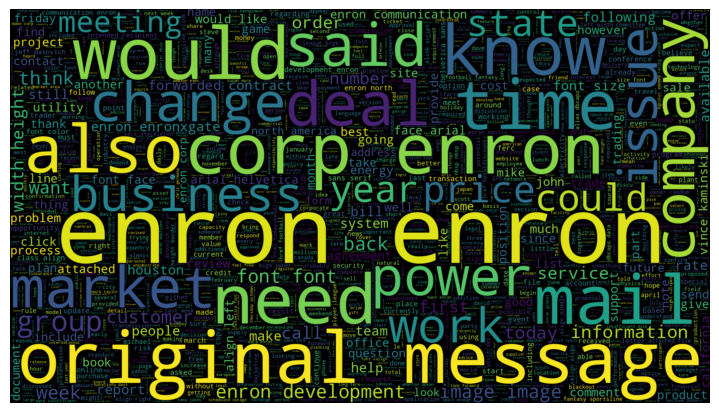

In [57]:
# plot the word cloud for text that is considered "fraud"
stop_words = set(stopwords.words('english'))
stop_words.update(('from','to','cc','http', 're', 'www', 'com','subject','sent','email','u','ok','thanks','please','ect'))
plt.figure(figsize = (7,7))
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 , stopwords = stop_words).generate(" ".join(sample_emails.cleaned_text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
n_features=1000
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words="english")
x_train = tfidf.fit_transform(sample_emails.cleaned_text)
print(x_train)

  (0, 543)	0.14337972453258116
  (0, 858)	0.21999951434405327
  (0, 458)	0.28766782349934084
  (0, 939)	0.2731661471683133
  (0, 363)	0.32323778675122117
  (0, 658)	0.2973977219781489
  (0, 246)	0.22688674514927284
  (0, 199)	0.23328281622359295
  (0, 438)	0.19316657190658498
  (0, 911)	0.1547204544078295
  (0, 165)	0.241957957460241
  (0, 776)	0.25345419241404826
  (0, 343)	0.3961830752698456
  (0, 463)	0.1401202686688133
  (0, 704)	0.27998947513375155
  (0, 904)	0.18926214360454802
  (1, 543)	0.02606302622015574
  (1, 199)	0.38164744409932916
  (1, 911)	0.08437350413048134
  (1, 904)	0.034403359521919814
  (1, 338)	0.054325441130979674
  (1, 959)	0.2678173203412209
  (1, 455)	0.2806477777772539
  (1, 924)	0.23676427363367292
  (1, 979)	0.3581266750082331
  :	:
  (2999, 517)	0.16530757714481814
  (2999, 524)	0.08979174221794033
  (2999, 893)	0.12095303428438545
  (2999, 539)	0.0885097799337375
  (2999, 512)	0.2667104406281112
  (2999, 66)	0.25208026119772814
  (2999, 902)	0.1099167234

In [63]:
(x_train.shape)

(3000, 1000)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD, NMF,LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN



n_components=2
n_clusters=2


nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(x_train)

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(x_train)
# # Dimensionality reduction algorithms
# dim_reductions = {
#     'pca': PCA(n_components=2),
#     'svd': TruncatedSVD(n_components=2, random_state=42),
#     'nmf': NMF(n_components=2, random_state=42)
# }

# # Clustering algorithms
# clusterings = {
#     'kmeans': KMeans(n_clusters=3, random_state=42),
#     'agglo': AgglomerativeClustering(n_clusters=3),
#     'dbscan': DBSCAN()
# }


# pipelines = []
# results = {}

# for dim_name, dim_algo in dim_reductions.items():
#     for cluster_name, cluster_algo in clusterings.items():
#         pipeline = Pipeline([
#             ('dim_reduction', dim_algo),
#             ('clustering', cluster_algo)
#         ])
#         pipelines.append((f'{dim_name}_{cluster_name}', pipeline))

# # Fit and transform the data using each pipeline
# for name, pipeline in pipelines:
#     X_reduced = pipeline.named_steps['dim_reduction'].fit_transform(x_train)
#     pipeline.named_steps['clustering'].fit(X_reduced)
#     results[name] = X_reduced

# # Print the results
# for name, X_reduced in results.items():
#     print(f'Results for {name}:')
#     print(X_reduced)


Extracting tf-idf features for NMF...
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


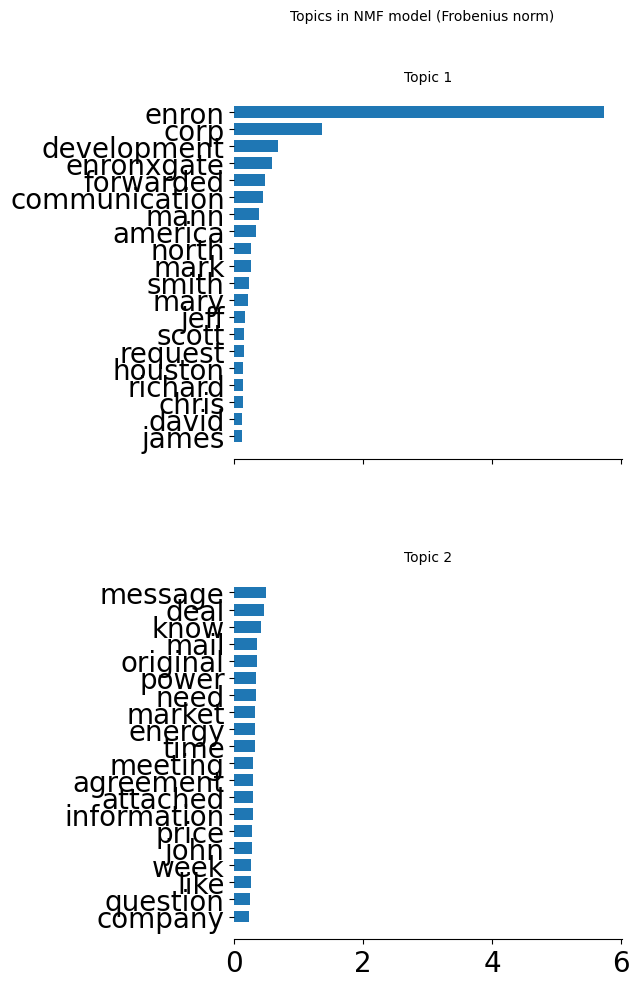

In [80]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


n_features = 1000
n_components = 2
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 10})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.





# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(sample_emails.cleaned_text)




# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)

nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)



tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)



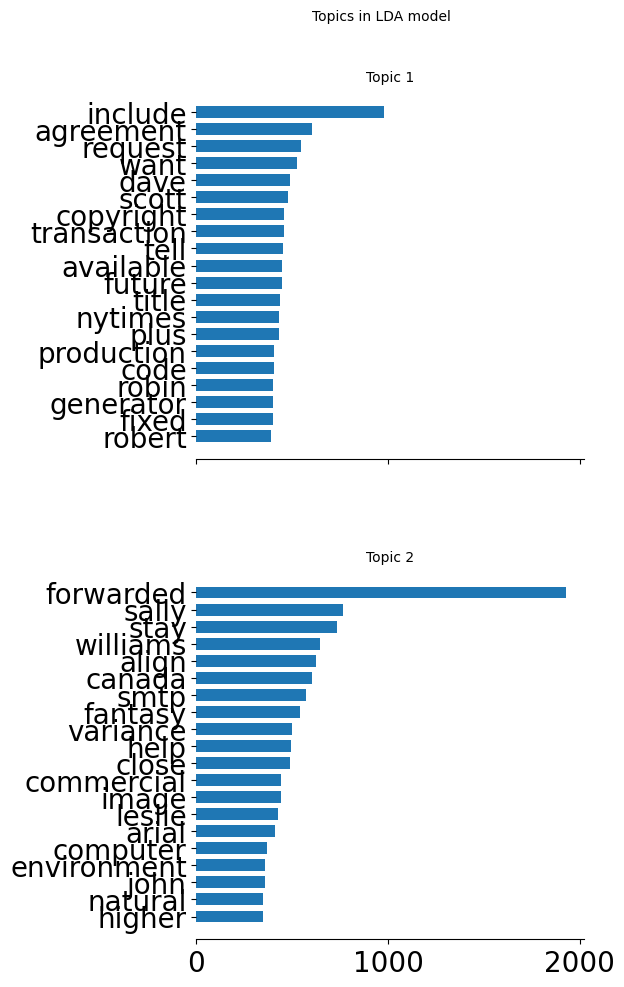

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

count= CountVectorizer(stop_words='english', max_df=0.1, max_features=n_features)
cv=count.fit_transform(sample_emails.cleaned_text)

tf_feature_names = count.get_feature_names_out()
from sklearn.decomposition import LatentDirichletAllocation

lda= LatentDirichletAllocation(n_components=2, random_state=123, learning_method='batch')
X_topics=lda.fit_transform(cv)

plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words,
    "Topics in LDA model ",
)

**truncatedsvd**

In [79]:
from sklearn.decomposition import TruncatedSVD


# Apply TruncatedSVD
model = TruncatedSVD(n_components=2, random_state=42)
SVD = model.fit_transform(tfidf)

print(SVD)


[[ 0.138926   -0.12781115]
 [ 0.32655127 -0.00192234]
 [ 0.14592736 -0.08858808]
 ...
 [ 0.09903133 -0.1417259 ]
 [ 0.10465048 -0.14690364]
 [ 0.37083674  0.12792692]]


In [85]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(SVD)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(SVD)

# DBSCAN Clustering
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(SVD)


In [86]:
# Transform the data using NMF
NMF_reduced = nmf.transform(tfidf)

# KMeans Clustering
kmeans_nmf = KMeans(n_clusters=2, random_state=42)
kmeans_nmf_labels = kmeans_nmf.fit_predict(NMF_reduced)

# Agglomerative Clustering
agglo_nmf = AgglomerativeClustering(n_clusters=2)
agglo_nmf_labels = agglo_nmf.fit_predict(NMF_reduced)

# DBSCAN Clustering
dbscan_nmf = DBSCAN()
dbscan_nmf_labels = dbscan_nmf.fit_predict(NMF_reduced)


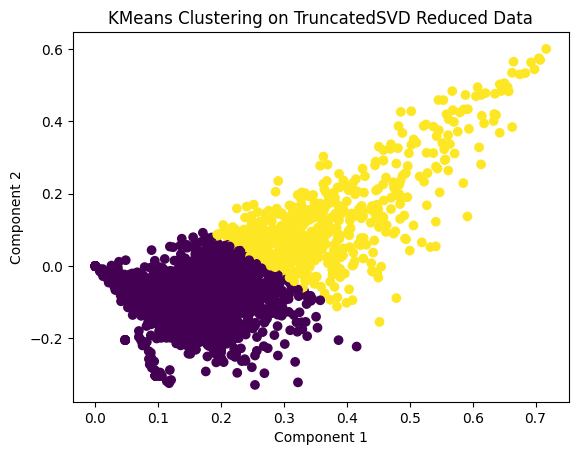

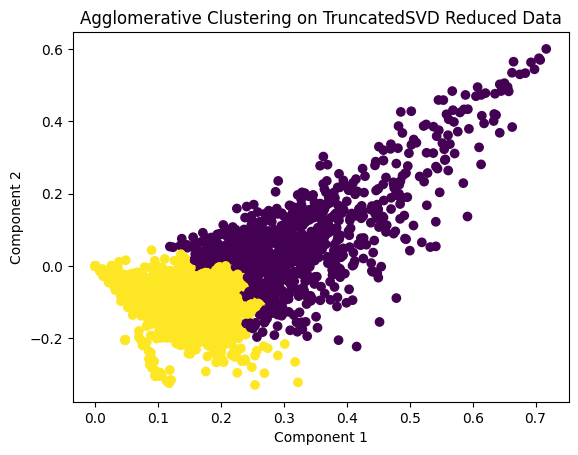

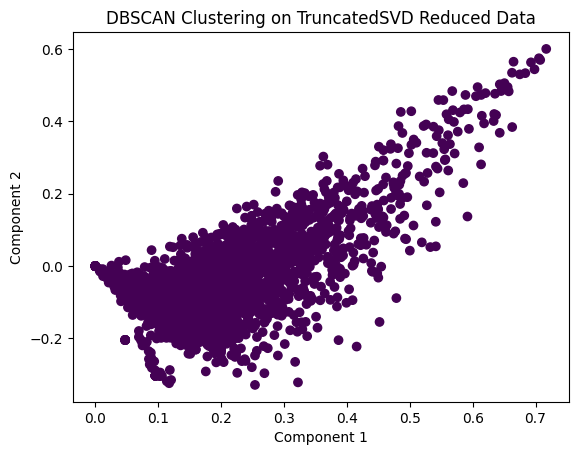

In [87]:
# Scatter plot for KMeans
plt.scatter(SVD[:, 0], SVD[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering on TruncatedSVD Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Scatter plot for Agglomerative Clustering
plt.scatter(SVD[:, 0], SVD[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering on TruncatedSVD Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Scatter plot for DBSCAN
plt.scatter(SVD[:, 0], SVD[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering on TruncatedSVD Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


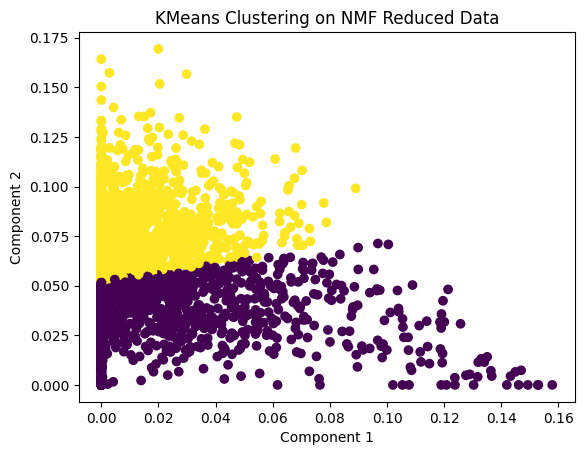

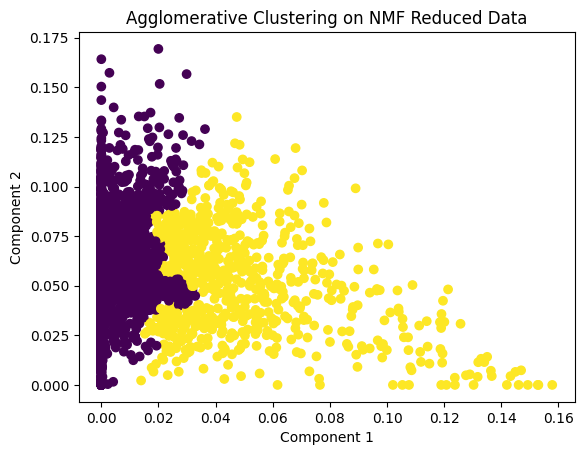

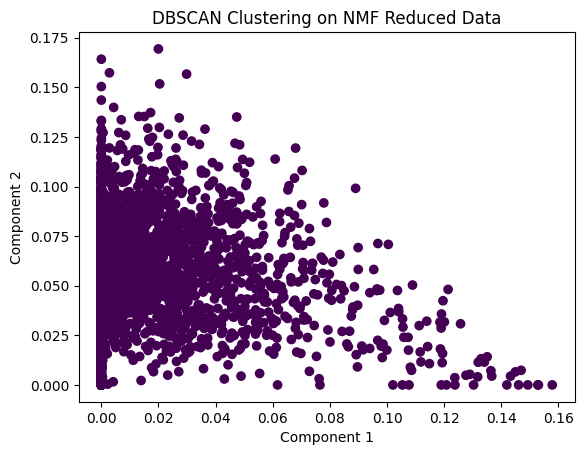

In [88]:
# Scatter plot for KMeans
plt.scatter(NMF_reduced[:, 0], NMF_reduced[:, 1], c=kmeans_nmf_labels, cmap='viridis')
plt.title('KMeans Clustering on NMF Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Scatter plot for Agglomerative Clustering
plt.scatter(NMF_reduced[:, 0], NMF_reduced[:, 1], c=agglo_nmf_labels, cmap='viridis')
plt.title('Agglomerative Clustering on NMF Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Scatter plot for DBSCAN
plt.scatter(NMF_reduced[:, 0], NMF_reduced[:, 1], c=dbscan_nmf_labels, cmap='viridis')
plt.title('DBSCAN Clustering on NMF Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [89]:
# Sort cluster centers for KMeans
tfidf_sorting_kmeans = kmeans_nmf.cluster_centers_.argsort()[:, ::-1]

# Print top features for KMeans clusters
print('Top features for KMeans Clustering on NMF Reduced Data:')
for i in range(kmeans_nmf.n_clusters):
    print(f'Cluster {i}:')
    print(tfidf_feature_names[tfidf_sorting_kmeans[i, :20]])

# If you want to do the same for TruncatedSVD reduced data
tfidf_sorting_kmeans_svd = kmeans.cluster_centers_.argsort()[:, ::-1]

print('Top features for KMeans Clustering on TruncatedSVD Reduced Data:')
for i in range(kmeans.n_clusters):
    print(f'Cluster {i}:')
    print(tfidf_feature_names[tfidf_sorting_kmeans_svd[i, :20]])


Top features for KMeans Clustering on NMF Reduced Data:
Cluster 0:
['able' 'ability']
Cluster 1:
['able' 'ability']
Top features for KMeans Clustering on TruncatedSVD Reduced Data:
Cluster 0:
['ability' 'able']
Cluster 1:
['ability' 'able']
